# Where to focus a marketing campaign?

## 📖 Background
You are a data analyst at a crowdfunding site. For the next quarter, your company will be running a marketing campaign. The marketing manager wants to target those segments that have donated the most in the past year. She turned to you to help her with her upcoming meeting with the CEO.

## 💾 The data
You have access to the following information:

#### Historic crowdfunding donations
- "category" - "Sports", "Fashion", "Technology", etc.
- "device" - the type of device used.
- "gender" - gender of the user.
- "age range" - one of five age brackets.
- "amount" - how much the user donated in Euros.

In [2]:
import pandas as pd
import plotly.express as px
marketing = pd.read_csv('./data/crowdfunding.csv')
marketing.head()

,category,device,gender,age,amount
0,Fashion,iOS,F,45-54,61.0
1,Sports,android,M,18-24,31.0
2,Technology,android,M,18-24,39.0
3,Technology,iOS,M,18-24,36.0
4,Sports,android,M,18-24,40.0


## Data Exploration

-------------------

In [3]:
marketing.describe()

,amount
count,20658.000000
mean,39.407009
std,14.913658
min,1.000000
25%,29.000000
50%,39.000000
75%,50.000000
max,101.000000


In [4]:
columns = marketing.columns
print(columns)

Index(['category', 'device', 'gender', 'age', 'amount'], dtype='object')


In [5]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20658 entries, 0 to 20657
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  20658 non-null  object 
 1   device    20658 non-null  object 
 2   gender    20658 non-null  object 
 3   age       20658 non-null  object 
 4   amount    20658 non-null  float64
dtypes: float64(1), object(4)
memory usage: 807.1+ KB


In [6]:
marketing.shape

(20658, 5)

### category column

In [7]:
## value colunts for specific category

category = pd.DataFrame(marketing['category'].value_counts())
category

,category
Sports,4179
Games,4173
Technology,4144
Environment,4089
Fashion,4073


In [8]:
marketing

,category,device,gender,age,amount
0,Fashion,iOS,F,45-54,61.0
1,Sports,android,M,18-24,31.0
2,Technology,android,M,18-24,39.0
3,Technology,iOS,M,18-24,36.0
4,Sports,android,M,18-24,40.0
...,...,...,...,...,...
20653,Sports,iOS,M,18-24,37.0
20654,Fashion,android,M,18-24,25.0
20655,Environment,android,F,35-44,35.0
20656,Sports,iOS,F,18-24,35.0


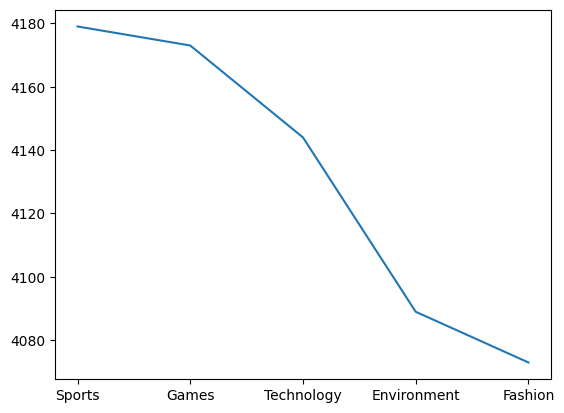

In [9]:
## ploting the variation of category data

import matplotlib.pyplot as plt
plt.plot(category)
plt.show()

### device column

In [10]:
device = pd.DataFrame(marketing['device'].value_counts())
device

,device
iOS,13459
android,7199


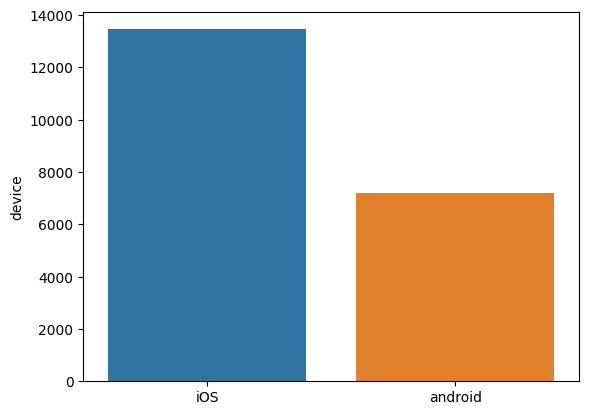

In [11]:
import seaborn as sns
sns.barplot(x = device.index, y = device.device)
plt.show()

In [12]:
gender = pd.DataFrame(marketing['gender'].value_counts())
gender

,gender
F,9602
M,9571
U,1485


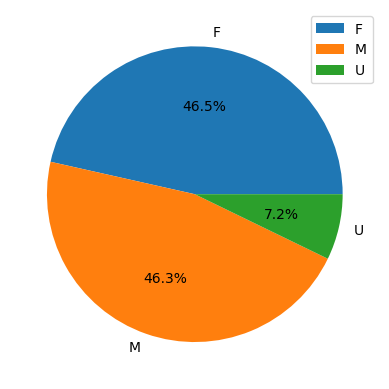

In [13]:
# plotting pie charts
plt.pie(gender.gender, labels = gender.index, autopct= '%1.1f%%')
plt.legend()
plt.show()

## 1. What are the top three categories in terms of total donations?

In [14]:
marketing.columns

Index(['category', 'device', 'gender', 'age', 'amount'], dtype='object')

Top 3 Categories and Total Donations
Games:165483.0
Sports:163528.0
Technology:162731.0


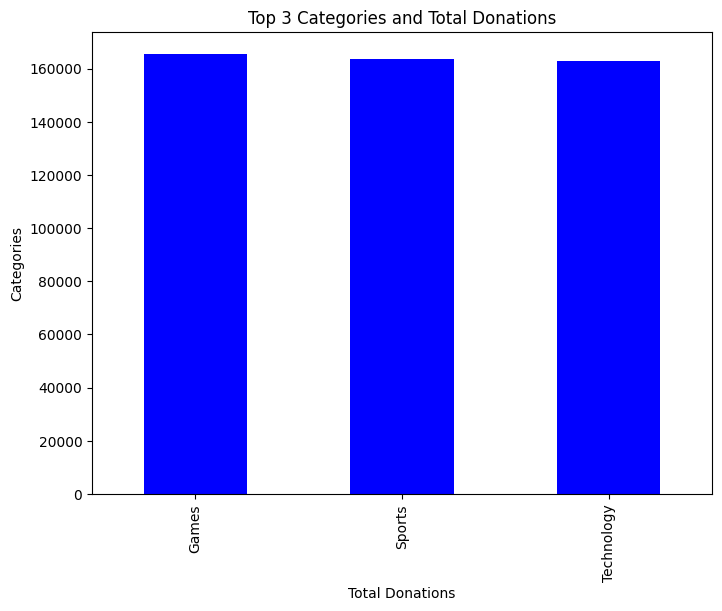

In [15]:
# Group the donation amount by category and calculate the total amount for each category using aggegrate functions
category_total = marketing.groupby('category')['amount'].sum()

# Sorting the values in total donation list 
sorted_category_total = category_total.sort_values(ascending = False)[:3]

## print top 3 categories and donation amount
print("Top 3 Categories and Total Donations")
for category, total_donations in sorted_category_total.items():
    print(f'{category}:{total_donations}')

## ploting stacked bar to visualize the same
sorted_category_total.plot(kind = 'bar', figsize = (8,6), color = ['blue'])
plt.title("Top 3 Categories and Total Donations")
plt.xlabel("Total Donations")
plt.ylabel("Categories")
plt.show()

### Conclusion : **Top 3 Categories are - 1. Games , 2. Sports, 3. Technology**

## 2. What device type has historically provided the most contributions?

In [16]:
marketing.columns

Index(['category', 'device', 'gender', 'age', 'amount'], dtype='object')

device
android    283545.0
iOS        530525.0
Name: amount, dtype: float64


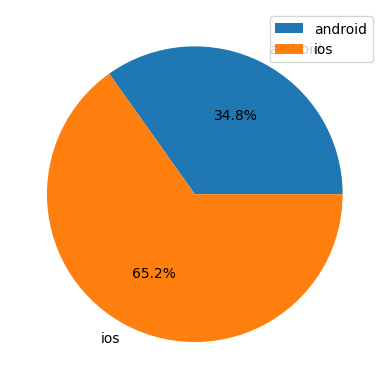

In [17]:
# Group the donation amount by device and calculate the total amount for each device using aggegrate functions
device_amount = marketing.groupby('device')['amount'].sum()

# Sorting the values based on device type
sorted_device_amount = device_amount.sort_values(ascending = True)
print(sorted_device_amount)

labels = ['android', 'ios']
# Plotting pie chart to visualize the result
plt.pie(sorted_device_amount, labels = labels, autopct = '%1.1f%%')
plt.legend()
plt.show()

### Conclusion : Device Type providing most contributions - IOS

## 3. What age bracket should the campaign target?

The age bracket that is contributing most should be targeted. 

18-24: 411077.0
35-44: 105597.0
25-34: 99763.0
55+: 98938.0
45-54: 98695.0


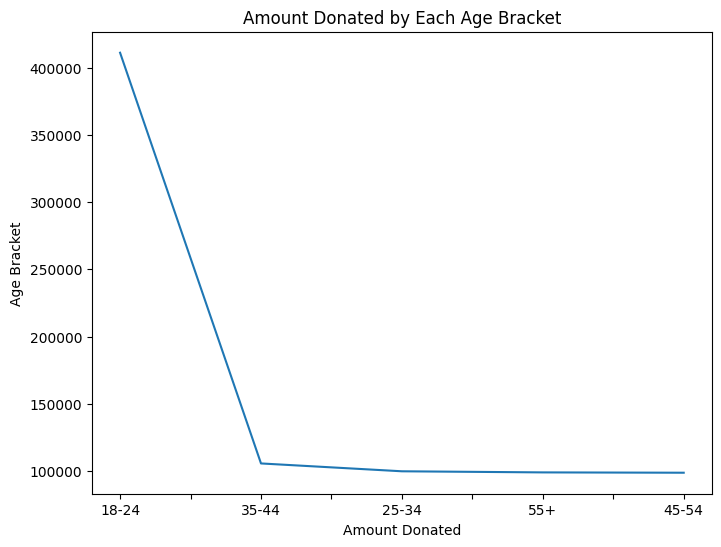

In [23]:
# Group the donation amount by age bracket and calculate the total amount for each age using aggegrate functions
age_amount = marketing.groupby('age')['amount'].sum()

# Sorting the values based on device type
sorted_age_amount = age_amount.sort_values(ascending = False)

for age_bracket, donation_amount in sorted_age_amount.items():
    print(f'{age_bracket}: {donation_amount}')
    
# plotting total amount donated with age bracket    
sorted_age_amount.plot(figsize = (8,6))    
plt.title("Amount Donated by Each Age Bracket")
plt.xlabel("Amount Donated")
plt.ylabel("Age Bracket")
plt.show()

## 💪 Challenge
Create a **single** visualization that the marketing manager can use to explore the data. Include:

1. What are the top three categories in terms of total donations? 
2. What device type has historically provided the most contributions? 
3. What age bracket should the campaign target?

## 🧑‍⚖️ Judging criteria

This is a community-based competition. The top 5 most upvoted entries will win.

The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria, so the workbook is focused on your answers.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!